In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as an
from IPython.display import display, HTML

In [60]:
    # load the raw data
raw_data = np.loadtxt("Mar-13-19-43-53-0.csv", dtype=int, delimiter=',', skiprows=3)
display(raw_data[1, :])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [68]:
# convert to 3d array
dim_y = 50
iterations = 100
slices = [raw_data[i*dim_y:(i+1)*dim_y] for i in range(iterations)]
display(slices[0].shape)
results = np.stack(slices)
display(results)

(50, 60)

array([[[1, 0, 0, ..., 0, 1, 0],
        [0, 1, 1, ..., 1, 0, 1],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [0, 1, 1, ..., 0, 1, 1]],

       [[0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 1, 1]],

       [[0, 1, 1, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 1, 1, ..., 1, 1, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [70]:
class animate_imshow():
    def __init__(self, array, dt=1):
        """
        Array is 3d with time on axis=0. Here I create the attributes and setup figure"
        """ 
        # setup data
        self.arr = array
        self.Nt = len(array)
        self.dt = dt

        # setup the figure
        self.fig = plt.figure(figsize=(10, 10))
        self.im = plt.imshow(array[0], animated=True, cmap='viridis')
        self.ax = plt.gca()
        self.text = self.ax.text(0.1, 0.1, 'Time: 0', color='w')

    def animate(self, html=True, filename="test_2.csv"):
        self.ani = an.FuncAnimation(self.fig, self.update, frames=range(self.Nt),
                                    interval=10, blit=True)
        if html:
            #plt.close('all')
            string = self.ani.to_jshtml()
            #HTML(string)
        #if filename != "":
            f = open(filename, 'w')
            f.write(self.ani.to_jshtml())
            

    def update(self, f):
        self.im.set_array(self.arr[f])
        self.text.set_text('Time: %i' % f * self.dt)
        return self.im, self.text

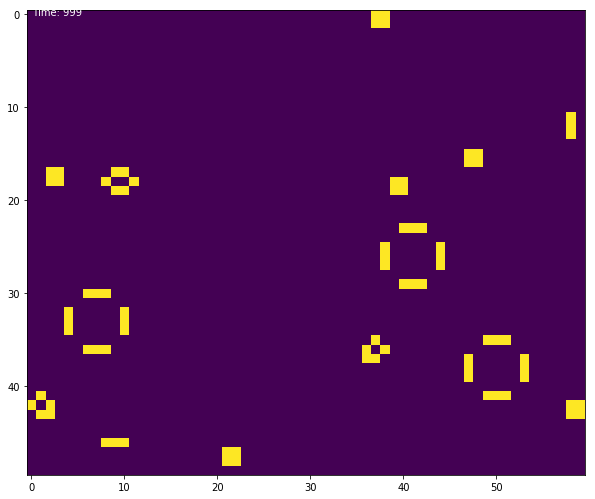

In [71]:
example = animate_imshow(results)
example.animate(filename="test.html")